In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [281]:
def save_png():
    pass



In [282]:
colors = {"lodówka": "limegreen", "zamrażarka": "blue", "półka": "gold", "szafka": "red"}
marker='o'
markersize = 4
linewidth=2.5

ticks = [
    datetime(2025, 3, 21),
    datetime(2025, 4, 1),
    datetime(2025, 4, 16),
    datetime(2025, 5, 1),
    datetime(2025, 5, 16),
    datetime(2025, 6, 1),
    datetime(2025, 6, 16),
    datetime(2025, 6, 30),
]
ticks.sort()                    # keep chronological order

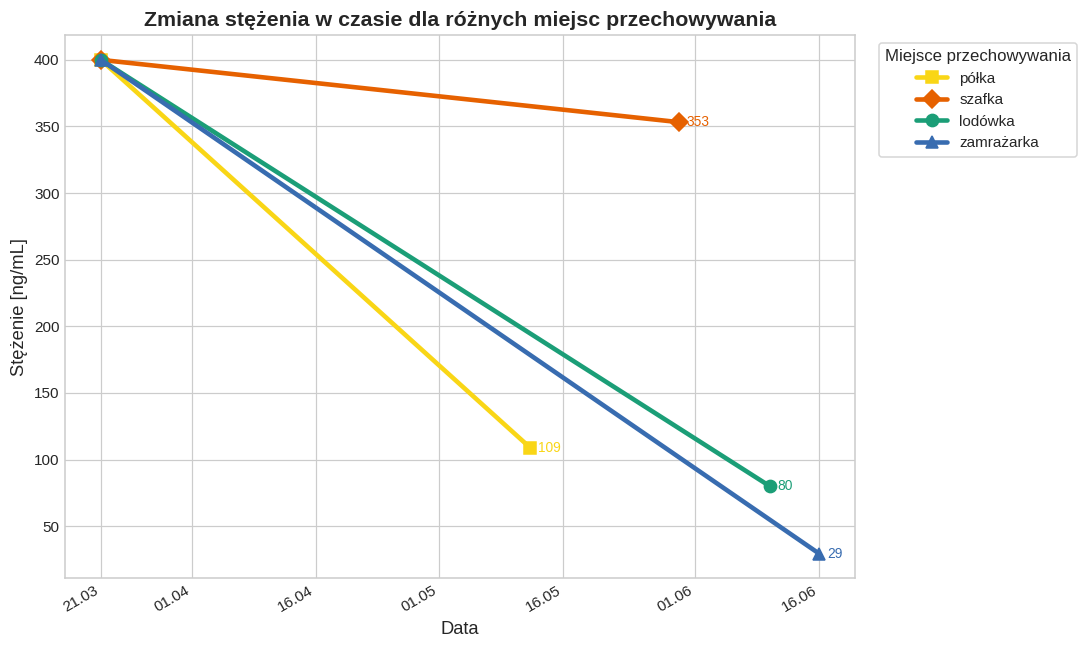

In [295]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib as mpl
import os

# ───────────────────────────────────────────────────────────────────────────────
# 1)  DATA
# ───────────────────────────────────────────────────────────────────────────────
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "12.05.2025", 108.92),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "30.05.2025", 353.25),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "10.06.2025", 80.13),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "16.06.2025", 29.41),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

# ───────────────────────────────────────────────────────────────────────────────
# 2)  STYLE TWEAKS
# ───────────────────────────────────────────────────────────────────────────────
plt.style.use("seaborn-v0_8-whitegrid")      # clean, publication-friendly look
mpl.rcParams.update({
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "legend.title_fontsize": 11,
    "legend.fontsize": 10,
})

palette = {       # colour-blind–friendly colours
    "półka":       "#F9D616",
    "szafka":      "#E66100",
    "lodówka":     "#1B9E77",
    "zamrażarka":  "#386CB0",
}

marker_styles = {   # different marker for each line
    "półka": "s",          # square
    "szafka": "D",         # diamond
    "lodówka": "o",        # circle
    "zamrażarka": "^",     # triangle up
}

# ───────────────────────────────────────────────────────────────────────────────
# 3)  PLOT
# ───────────────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 6), dpi=110)

for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    ax.plot(
        dates, values,
        label=place,
        marker=marker_styles[place],
        markersize=8,
        linewidth=3,
        color=palette[place],
    )
    # annotate last point with value
    last_date, last_val = pairs[-1]
    ax.annotate(f"{last_val:.0f}",
                (last_date, last_val),
                xytext=(5, 0), textcoords="offset points",
                va="center", fontsize=9, color=palette[place])

ax.set_xlabel("Data")
ax.set_ylabel("Stężenie [ng/mL]")
ax.set_title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")

# custom ticks (21 Mar + 1st & 16th)
ticks = [
    datetime(2025, 3, 21),
    datetime(2025, 4, 1), datetime(2025, 4, 16),
    datetime(2025, 5, 1), datetime(2025, 5, 16),
    datetime(2025, 6, 1), datetime(2025, 6, 16),
]
ax.set_xticks(ticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
fig.autofmt_xdate()     # tilt labels for readability

# legend just outside the axes
ax.legend(
    title="Miejsce przechowywania",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    frameon=True
)

fig.tight_layout()

# ───────────────────────────────────────────────────────────────────────────────
# 4)  SAVE + SHOW
# ───────────────────────────────────────────────────────────────────────────────
os.makedirs("images", exist_ok=True)
fig.savefig("images/Stezenie1_pretty.png", bbox_inches="tight", dpi=300)

plt.show()


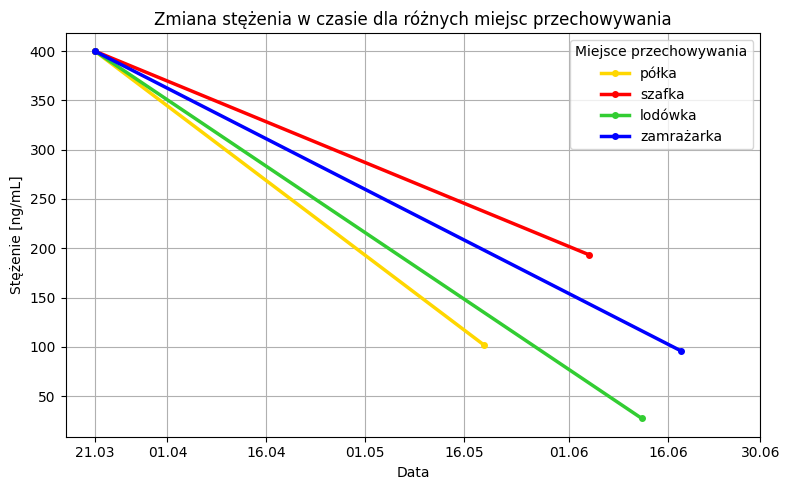

In [284]:
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "19.05.2025", 102.13),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "04.06.2025", 193.43),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "12.06.2025", 27.38),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "18.06.2025", 95.74),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel("Stężenie [ng/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-2-400ng.png")
plt.show()

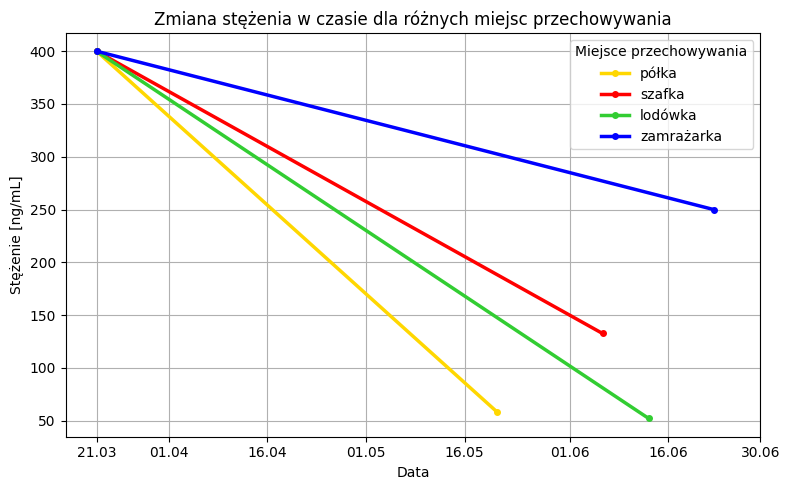

In [285]:
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "21.05.2025", 57.91),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "06.06.2025", 132.55),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "13.06.2025", 52.13),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "23.06.2025", 249.83),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel("Stężenie [ng/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-3-400ng.png")
plt.show()

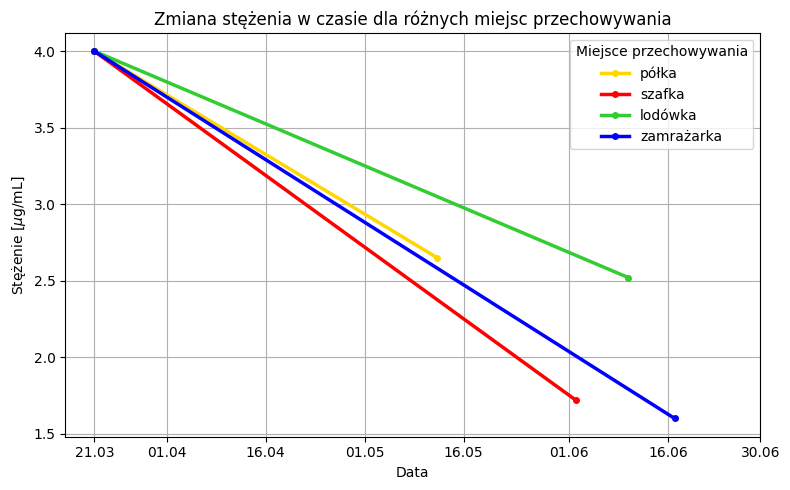

In [286]:
records = [
    ("półka",      "21.03.2025", 4),
    ("półka",      "12.05.2025", 2.65),
    ("szafka",     "21.03.2025", 4),
    ("szafka",     "02.06.2025", 1.72),
    ("lodówka",    "21.03.2025", 4),
    ("lodówka",    "10.06.2025", 2.52),
    ("zamrażarka", "21.03.2025", 4),
    ("zamrażarka", "17.06.2025", 1.60),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-1-4ug.png")
plt.show()

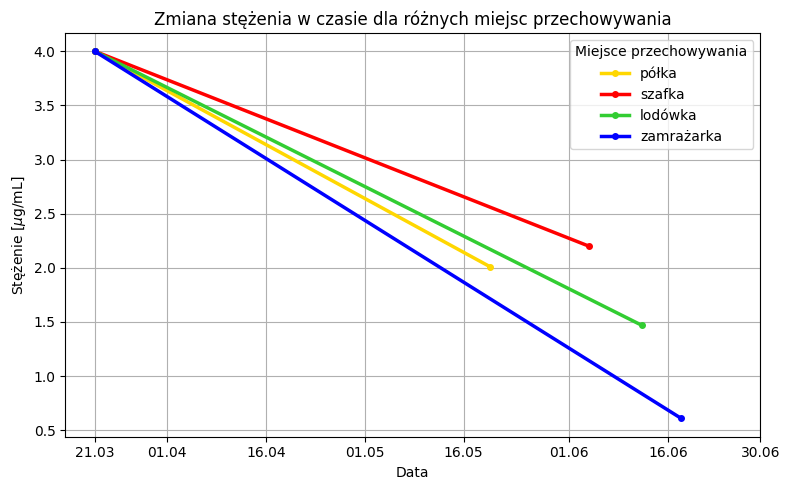

In [287]:
records = [
    ("półka",      "21.03.2025", 4),
    ("półka",      "20.05.2025", 2.01),
    ("szafka",     "21.03.2025", 4),
    ("szafka",     "04.06.2025", 2.20),
    ("lodówka",    "21.03.2025", 4),
    ("lodówka",    "12.06.2025", 1.47),
    ("zamrażarka", "21.03.2025", 4),
    ("zamrażarka", "18.06.2025", 0.61),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-2-4ug.png")
plt.show()

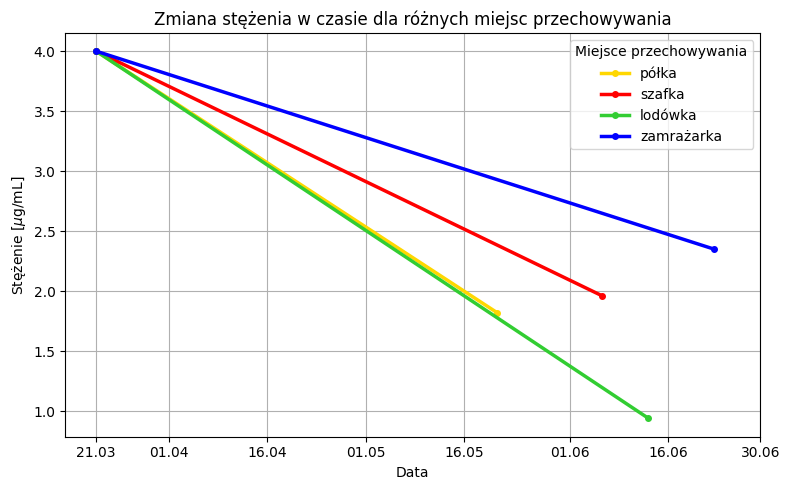

In [288]:
records = [
    ("półka",      "21.03.2025", 4),
    ("półka",      "21.05.2025", 1.82),
    ("szafka",     "21.03.2025", 4),
    ("szafka",     "06.06.2025", 1.96),
    ("lodówka",    "21.03.2025", 4),
    ("lodówka",    "13.06.2025", 0.94),
    ("zamrażarka", "21.03.2025", 4),
    ("zamrażarka", "23.06.2025", 2.35),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-3-4ug.png")
plt.show()

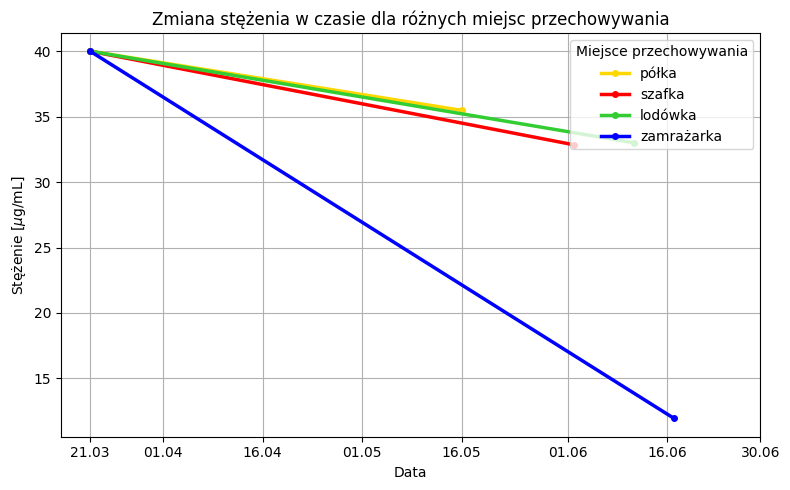

In [289]:
records = [
    ("półka",      "21.03.2025", 40),
    ("półka",      "16.05.2025", 35.48),
    ("szafka",     "21.03.2025", 40),
    ("szafka",     "02.06.2025", 32.84),
    ("lodówka",    "21.03.2025", 40),
    ("lodówka",    "11.06.2025", 33.00),
    ("zamrażarka", "21.03.2025", 40),
    ("zamrażarka", "17.06.2025", 11.95),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-1-40ug.png")
plt.show()

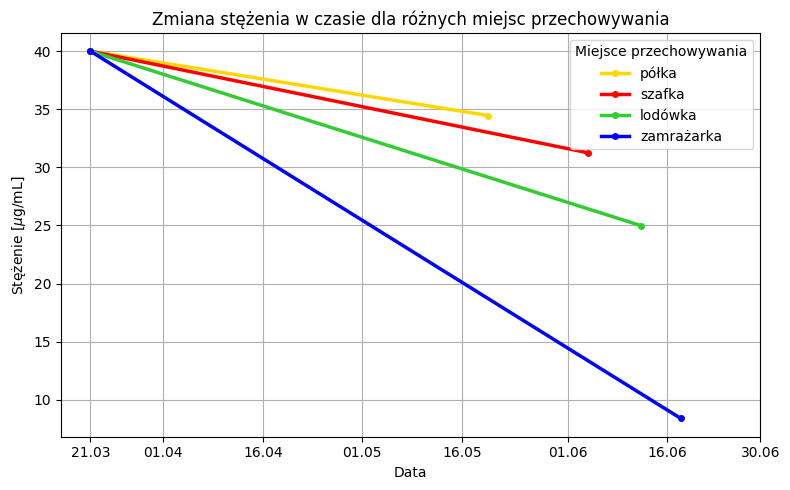

In [290]:
records = [
    ("półka",      "21.03.2025", 40),
    ("półka",      "20.05.2025", 34.46),
    ("szafka",     "21.03.2025", 40),
    ("szafka",     "04.06.2025", 31.26),
    ("lodówka",    "21.03.2025", 40),
    ("lodówka",    "12.06.2025", 24.99),
    ("zamrażarka", "21.03.2025", 40),
    ("zamrażarka", "18.06.2025", 8.40),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-2-40ug.png")
plt.show()

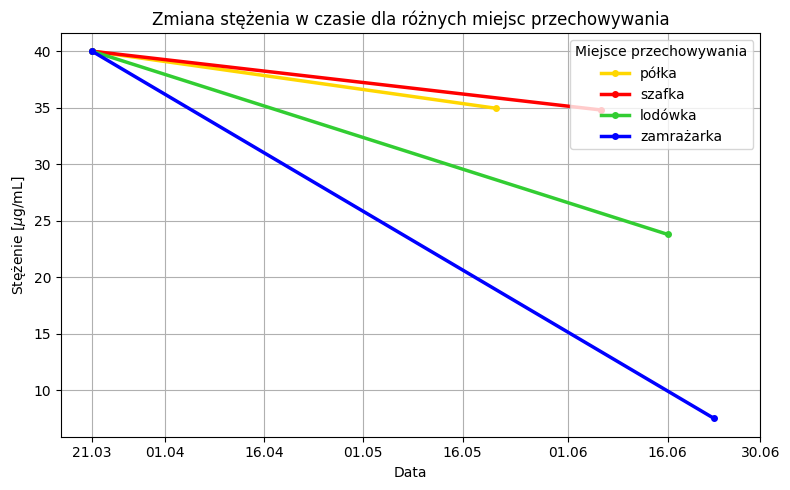

In [291]:
records = [
    ("półka",      "21.03.2025", 40),
    ("półka",      "21.05.2025", 34.95),
    ("szafka",     "21.03.2025", 40),
    ("szafka",     "06.06.2025", 34.79),
    ("lodówka",    "21.03.2025", 40),
    ("lodówka",    "16.06.2025", 23.78),
    ("zamrażarka", "21.03.2025", 40),
    ("zamrażarka", "23.06.2025", 7.49),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-3-40ug.png")
plt.show()

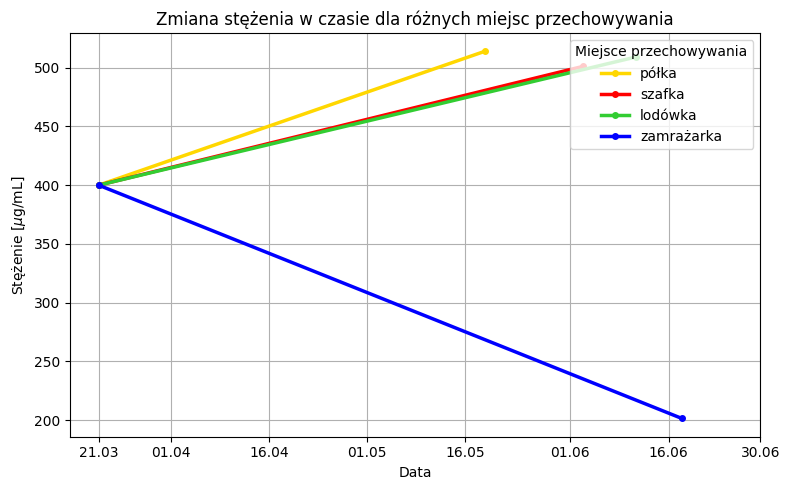

In [292]:
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "19.05.2025", 514.10),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "03.06.2025", 501.25),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "11.06.2025", 509.15),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "18.06.2025", 201.43),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-1-400ug.png")
plt.show()

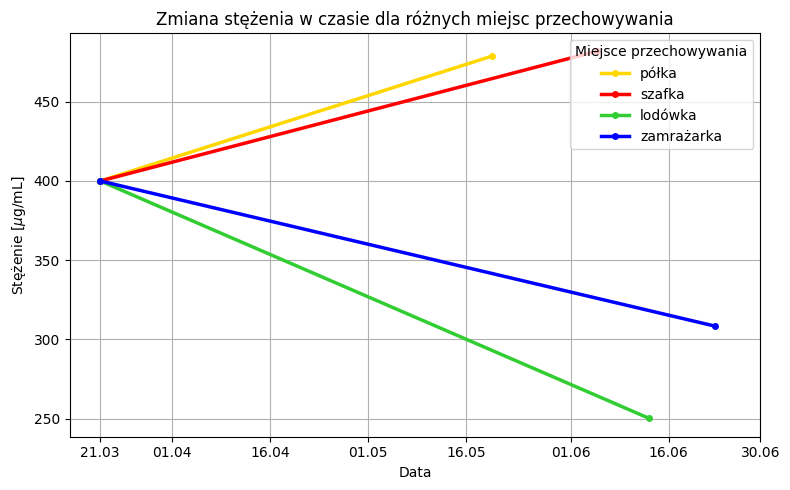

In [293]:
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "20.05.2025", 478.90),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "05.06.2025", 481.93),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "13.06.2025", 250.17),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "23.06.2025", 308.47),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-2-400ug.png")
plt.show()

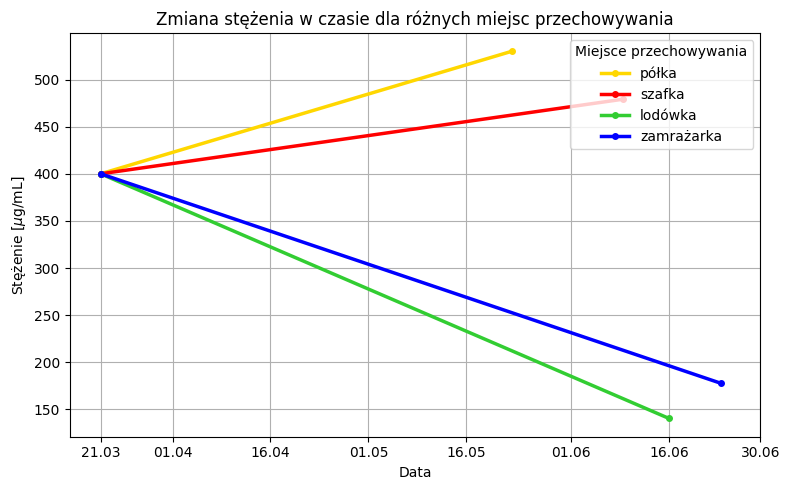

In [294]:
records = [
    ("półka",      "21.03.2025", 400),
    ("półka",      "23.05.2025", 530.09),
    ("szafka",     "21.03.2025", 400),
    ("szafka",     "09.06.2025", 479.15),
    ("lodówka",    "21.03.2025", 400),
    ("lodówka",    "16.06.2025", 140.55),
    ("zamrażarka", "21.03.2025", 400),
    ("zamrażarka", "24.06.2025", 177.70),
]

data_by_place = {}
for place, date_str, value in records:
    dt = datetime.strptime(date_str, "%d.%m.%Y")
    data_by_place.setdefault(place, []).append((dt, value))

plt.figure(figsize=(8, 5))
for place, pairs in data_by_place.items():
    pairs.sort(key=lambda x: x[0])
    dates, values = zip(*pairs)
    plt.plot(
        dates, values,
        marker=marker,
        linewidth=linewidth,
        label=place,
        markersize=markersize,
        color=colors.get(place) 
    )

plt.xlabel("Data")
plt.ylabel(r"Stężenie [$\mu$g/mL]")
plt.title("Zmiana stężenia w czasie dla różnych miejsc przechowywania")
plt.legend(title="Miejsce przechowywania", loc='upper right')
plt.grid(True)

ax = plt.gca()
ax.set_xticks(ticks) # type: ignore
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

plt.tight_layout()  
plt.savefig("images/Stezenie-3-400ug.png")
plt.show()